<!---
right arrow
&#8594;
-->

# Quantify the influence of cell discretization on well water level

## Base model

* $1 km \, x \, 1 km$ model
* $10 m$ thick aquifer
* CHD left and right with $12 m$
* $k_f = 10 m/d →  8,64^{-4}$ m/s
* Setup multiple models with different discretizations:
    * $100 \, x \, 100 m → 100$ cells
    * $10 \, x \, 10 m → 10,000$ cells
    * $5 \, x \, 5 m → 40,000$ cells
    * $1 \, x \, 1 m → 1,000,000$ cells
    * $0.5 \, x \, 0.5 m → 4,000,000$ cells
    * $0.25 \, x \, 0.25 m → 16,000,000$ cells
* $t = 100 d$
* $q = 500 $m^3/d$

## Variation

* Multiple layers
* Thicknesses: $10 m, 2 m, 10 m$
* Well in the lowest layer
* $k_f = 1 m/d, 0.01 m/d, 10 m/d$
* Number of cells times three

In [1]:
%load_ext autoreload
%autoreload all

In [2]:
from pymf6tools.make_model import run_simulation
from pymf6tools.plotting import show_heads, show_well_head, show_bcs

In [3]:
"""Create simple well model."""

from pymf6tools.make_model import make_input
from pymf6tools.base_model import make_model_data

def create_model(
    model_path, 
    name, 
    cell_width=100,
    cell_height=100,
    cell_thickness=10,
    model_width=1_000, 
    model_height=1_000,
    q=-1000,
    chd_left=12,
    chd_right=12,
):
    """Create well pumping model."""
    name = f'{name}_{cell_width}_{cell_height}'

    rows = model_width / cell_width
    cols = model_height / cell_height
    nrows = int(rows)
    ncols = int(cols)
    assert rows == nrows
    assert cols == ncols
    well_col = ncols // 2
    well_row = nrows // 2
    well_layer = 0
    chd = [[(0, row, 0), chd_left] for row in range(nrows)]
    chd.extend([[(0, row, ncols - 1), chd_right] for row in range(nrows)])
    wells = {'well': {'q': (q, q, q), 'coords': (well_layer, well_row, well_col)}}

    specific_model_data = {
        'model_path': model_path,
        'name': name,
        'nrow': nrows, 
        'ncol': ncols, 
        'nlay': 1,
        'delr': cell_height,
        'delc': cell_width,
        'top': cell_thickness, 
        'botm': 0,
        'length_units': 'm',
        'time_units': 'd',
        'times': (
            100.0, # perlen
            100,   # nstp 
            1.0,   # tsmult 
        ),
        'repeat_times': 1,
        'k': [10],  # initial value of k
        'k33': [0.1],  # vertical anisotropy
        'obs': [
            ('well', (well_layer, well_row, well_col)),
        ],
        'chd': chd,
        'wells': wells,
        'transport': False,
        'river_active': False,
        'wells_active': True,
    }

    model_data = make_model_data(specific_model_data)
    make_input(model_data)
    return name, well_col, well_row 

In [4]:
model_path = 'models/mf6'
name = 'dis'
cell_width = 1
cell_height = 1
new_name, well_col, well_row = create_model(
    model_path=model_path, name=name, cell_width=cell_width, cell_height=cell_height)

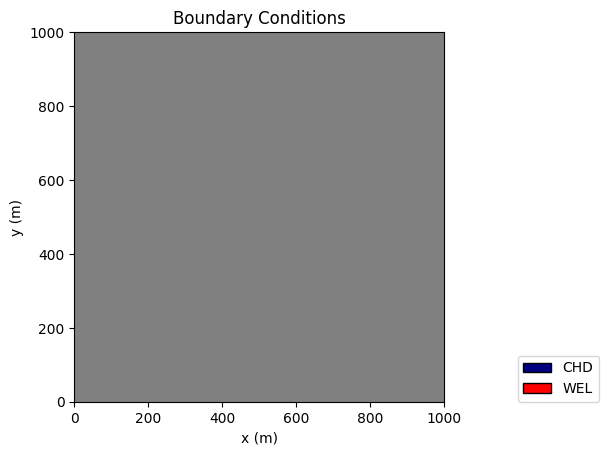

In [5]:
p = show_bcs(model_path=model_path, name=new_name, bc_names = ('chd', 'wel'))

In [6]:
run_simulation(model_path=model_path)

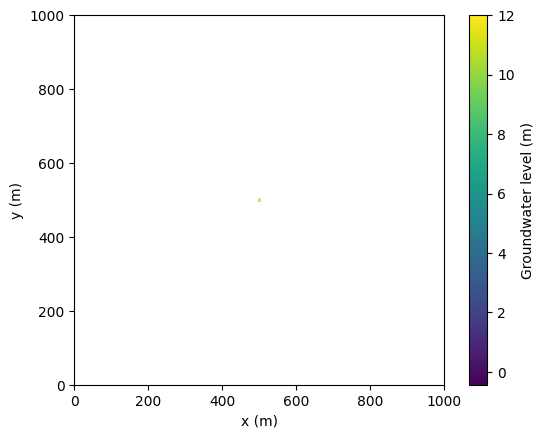

In [7]:
show_heads(model_path=model_path, name=new_name, kstpkper=(99, 1), spdis_index=100, title='');

In [8]:
from pymf6tools.make_model import get_simulation

sim = get_simulation(model_path, new_name)
gwf = sim.get_model('gwf_' + new_name)
head = gwf.output.head().get_ts((0, well_col, well_row))[-1][-1]
head

-0.4308529091333932

In [9]:
well_col, well_row 

(500, 500)

In [10]:
h.get_data(idx=99)

NameError: name 'h' is not defined

In [ ]:
from create_model import create_model, run_and_get_well_level, get_well_level

def run(size=100):
    m_model = {'cell_width': size, 'cell_height': size}
    return run_and_get_well_level(*create_model(extra_model_data=m_model))

In [ ]:
run(100)

In [ ]:
run(10)

In [ ]:
run(5)

In [ ]:
run(1)

In [ ]:
run(0.8)

In [ ]:
run(0.5)

In [ ]:
from pathlib import Path

In [ ]:
get_well_level(model_path=Path('models/dis_0.5_0.5/'), well_col=1000, well_row=1000)

In [ ]:
get_well_level(model_path=Path('models/dis_0.5_0.5/'), well_col=1001, well_row=1001)

In [ ]:
run(0.25)

In [ ]:
len("GWF_DIS_0.25_0.25")

In [ ]:
get_well_level(model_path=Path('models/d_0.25_0.25/'), well_col=2000, well_row=2000)

In [ ]:
get_well_level(model_path=Path('models/d_0.25_0.25/'), well_col=2001, well_row=2001)

In [ ]:
get_well_level(model_path=Path('models/d_0.25_0.25/'), well_col=2002, well_row=2002)

In [ ]:
show_heads(model_path='models/d_0.25_0.25/', name='d_0.25_0.25', kstpkper=(99, 1), spdis_index=100, 
           title='',
           show_grid=False,
          );

In [ ]:
show_heads(model_path='models/d_5_5/', name='d_5_5', kstpkper=(0, 1), spdis_index=100, 
           title='',
           show_grid=False,
           show_contours=False,
          );

In [ ]:
show_heads??

In [ ]:
from base_data import BASE_MODEL_DATA
from run_models import main

In [ ]:
BASE_MODEL_DATA

In [ ]:
main()

In [ ]:
!mv example_disc.py run_models.py

In [ ]:
from analytical import make_data, make_steady_state_model, make_transitent_model, get_well_head, plot_contour, AnalyticModel

In [ ]:
data = make_data(
    extra_data={
        #'well_screen_resistance': 0.05,
        #'well_caisson_radius': 20.5,
    })
st = make_steady_state_model(data)
tr = make_transitent_model(data, steady_state_ml=st)
get_well_head(tr, data, x_offset=0.25)

In [ ]:
ml.

In [ ]:
get_well_head(tr, data)

In [ ]:
plot_contour(tr, data)

In [ ]:
ana = AnalyticModel(extra_data={'well_radius': 1e-2})

In [ ]:
ana.get_well_head()

In [ ]:
ana.plot_contour()

In [ ]:
class Object():
    pass

In [ ]:
o = Object()

In [ ]:
o.x = 2